# Prision Calls: test

## Te voy a ir haciendo un par de de comments "inline" en el medio de tu codigo remarcando
como deberias hacer y, si no tengo paja 😛, poniendo porque estaba mal. 
No te lo tomes a mal, los programadores son asi secos y les da paja escribir mucho xD


### otra cosa
esto lo voy a hacer que ande para python 3.6

Si no lo tenes, instalalooo. Paja cualquier otra cosa

In [1]:
import pandas as pd
import numpy as np

In [5]:
file_path = 'call_sample.csv'
# df = pd.DataFrame(pd.read_csv(file_path)) # innecesario el pd.DataFrame() que es un constructor de DFs, 
# pandas ya lo hace por vos 
df = pd.read_csv(file_path)
# tmb si haces pd.read_csv? vas a ver que te dice que la fn (funcion) devuelve un DataFrame justamente (abajo del todo)

In [6]:
pd.read_csv?

In [7]:
df.sample(10) # bien esto ahi explorando ;)

,IMSI,IMEI,NUMBER,TIME,AMPM,DATE,CDMAGSM,CALL
50,310410466859365,357592020817640,611,11:35:01,AM,04/23/12,GSM,1
55,310006622800127,0x80af16bf,6628368847,07:16:19,AM,02/02/12,CDMA,1
53,310006623142166,0x80fd43e4,6625016465,07:49:38,PM,06/04/12,CDMA,1
21,310410527213574,863806011948390,6015038510,02:09:38,PM,07/31/12,GSM,1
58,310008139598104,0x80fe96df,8137083926,06:38:41,PM,04/24/12,CDMA,0
69,310006622391024,0x80c5e82f,6015294997,05:00:22,PM,06/02/12,CDMA,0
90,310000000009954,0x80c9f852,*22898,11:15:12,AM,03/07/12,CDMA,1
59,310260444493737,352494031069980,611,02:56:59,PM,07/22/12,GSM,1
95,310005612548948,0x80b98811,6626704027,05:19:17,PM,05/06/12,CDMA,1
64,310008139598104,0x80fe96df,7867381979,05:00:10,PM,05/04/12,CDMA,0


In [8]:
df['DATE_TIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'] + ' ' + df['AMPM'])

In [12]:
df.head()

,IMSI,IMEI,NUMBER,TIME,AMPM,DATE,CDMAGSM,CALL,DATE_TIME
0,310006623866272,0x80f27dab,6624480934,07:38:03,PM,02/16/12,CDMA,1,2012-02-16 19:38:03
1,310002282029546,0x80f3a808,7123387774,09:48:30,PM,04/23/12,CDMA,1,2012-04-23 21:48:30
2,310002282029546,0x80f3a808,6627198556,08:22:39,AM,04/02/12,CDMA,1,2012-04-02 08:22:39
3,310009015811666,0x80dae923,3187378367,01:00:54,PM,07/11/12,CDMA,0,2012-07-11 13:00:54
4,311236015758052,0x80c73f79,2514586207,05:44:36,PM,02/16/12,CDMA,1,2012-02-16 17:44:36


In [13]:
#Modificaciones al dtype
df['DATE_TIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'] + ' ' + df['AMPM'])
# df['IMSI'] = [str(x) for x in df['IMSI']] # porque haces esto de tenerlo en un str? es un numero y mejor 
# tratarlo como tal. Si realmente necesitas convertirlo haces .astyp(str). Porque? porque es la forma coreccta/rapida
# pensada por pandas para esta tarea. Google.
df['IMSI'] = df['IMSI'].astype(str)
#  df['NUMBER'] = [str(x) for x in df['NUMBER']] # idem a lo de arriba PORQUE EN STR??? 
df['NUMBER'] = df['NUMBER'].astype(str)
df.drop(['TIME', 'DATE'], axis=1, inplace=True)

### Defino y aplico la función para extraer el código de área

El código de área es de tres dígitos y debería estar en las posiciones **XXX**-000-0000 del número de teléfono. No se cumple siempre, algunos números están mal marcados, tienen menos de 10 dígitos o algunos vienen con el prefijo internacional.

In [37]:
df['AREA_CODE'] = np.nan

In [20]:
# aca me doy cuenta porque `df['NUMBER'].astype(str)
# hagamos rewind
df['NUMBER'] = pd.to_numeric(df['NUMBER'], errors="coerce", # este errors coerce es clave porque hay un par 
# de numeros medio falopa tipo *86
)
# aca los numeros mal convertidos
df.query("NUMBER.isnull()") # te recomiendo banda banda `.query()`, es mas copado que poner df[df.NUMBER.isnull()]

,IMSI,IMEI,NUMBER,AMPM,CDMAGSM,CALL,DATE_TIME
35,310006622611177,0x80fe309b,NaN,AM,CDMA,1,2012-03-30 09:11:57
45,310000000002641,0x80b98811,NaN,PM,CDMA,1,2012-06-02 17:52:35
90,310000000009954,0x80c9f852,NaN,AM,CDMA,1,2012-03-07 11:15:12


In [ ]:
# def area_code(x):
#     if len(x.loc['NUMBER']) >= 10:3
#         x.loc['AREA_CODE'] = x.loc['NUMBER'][-10:-7] 
#     else:
#         x.loc['AREA_CODE'] = np.nan
#     return x

In [45]:
# modifico esto para que funcione los siguiente
def area_code(number):
    rv = np.nan # significa return value
    # busco la cantidad de digitos tomando log base 10, sumando 1 y redondeando
    if np.floor(np.log10(number)+1) == 10: # mejor ==10 o no? si el numero es mas largo tmb es una anomalia
        rv = number//1e7 # // es la divison entera, x ej 5//2 = 2. Basicamente le saco los ultimos 6 numeros
    return rv

In [46]:
%%time
# df = df.apply(area_code, axis=1)
# asi se usan los applys. Es mas rapido pasar solo la columna de tu interes
# y en general es mejor guardar el resultado del apply en una nueva columna:
col = 'NUMBER'
new_col = 'first_digits' # no me gusta el nombre de las cols en mayuscula, paja escribir on shift xD
df[new_col] = df[col].apply(area_code)
# tmb podes usar


CPU times: user 1.57 ms, sys: 200 µs, total: 1.77 ms
Wall time: 1.57 ms


In [50]:
df.sample(5)

,IMSI,IMEI,NUMBER,AMPM,CDMAGSM,CALL,DATE_TIME,first_digits
72,310006622800127,0x80af16bf,6.628369e+09,AM,CDMA,1,2012-02-17 10:51:12,662.0
78,310410466859365,357592020817640,6.110000e+02,PM,GSM,1,2012-06-27 12:25:35,NaN
48,310006015751212,0x80aef3b9,5.096761e+09,PM,CDMA,1,2012-03-11 21:26:39,509.0
12,310006622391024,0x80c5e82f,6.622678e+09,PM,CDMA,0,2012-06-23 22:34:53,662.0
77,310006623142166,0x80fd43e4,5.096761e+09,PM,CDMA,1,2012-06-05 14:13:33,509.0


In [40]:
## esto nooo taa maaaal xD
# Alternativa
#%%time
#for i in range(len(df['NUMBER'])):
#    if len(df.loc[df.index[i], 'NUMBER']) >= 10:
#        df.loc[df.index[i], 'AREA_CODE'] = df.loc[df.index[i], 'NUMBER'][-10:-7]
#    else:
#        df.loc[df.index[i], 'AREA_CODE'] = np.nan

_OTRO TEMA: 
imaginate si quiero hacer una nueva variable dummy que compare el llamado de la fila que estoy mirando con el último llamado desde ese mismo IMSI y registre: 1 si el último llamado fue dentro de los últimos 15 minutos, 0 si pasaron más de 15 minutos y NaN si no hay un llamado previo. ¿Cómo escribirías eso en una función que puedas correr con un df.apply()? ¿O hay una mejor manera de hacerlo?_

## answer otro tema

No se usan applys ahi sino que se usan `.groupby` combinado con `.shift`.
shift literal es, para una collumna, hago saltar mover a todas las filas N para bajo (N puede ser negativo con lo cual ahi suben)

tmb creo que sirve transform
http://pbpython.com/pandas_transform.html

In [ ]:
pd.Series.shift?

In [52]:
# esta funcion copada la uso despues, es "el print" de la jupyter
from IPython.display import display
# proba print(df) vs. display(df) y vas a ver ;)

In [53]:
## un poco de descriptivas que me copan
for col in df.columns:
    display(df[col].describe())

count                 100
unique                 41
top       310006623142166
freq                    9
Name: IMSI, dtype: object

count            100
unique            38
top       0x80fd43e4
freq               9
Name: IMEI, dtype: object

count    9.700000e+01
mean     8.253028e+09
std      1.948360e+10
min      6.110000e+02
25%      4.439681e+09
50%      6.015295e+09
75%      6.627159e+09
max      1.800473e+11
Name: NUMBER, dtype: float64

count     100
unique      2
top        PM
freq       69
Name: AMPM, dtype: object

count      100
unique       2
top       CDMA
freq        83
Name: CDMAGSM, dtype: object

count    100.000000
mean       0.740000
std        0.440844
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: CALL, dtype: float64

count                     100
unique                    100
top       2012-07-24 05:03:39
freq                        1
first     2012-02-01 14:18:10
last      2012-07-31 14:09:38
Name: DATE_TIME, dtype: object

count     83.000000
mean     563.879518
std      185.751827
min      206.000000
25%      509.000000
50%      601.000000
75%      662.000000
max      985.000000
Name: first_digits, dtype: float64

## no se si ves
aca mas abajo pero es rarisimo el IMSI y el IMEI se repiten igual cantidad de veces
sin embargo el numero se repite mas veces.. osea para c/llamado con 1 numero deberia usarse
el mismo imsi /imei o no? A menos que esten cambiando de sim en el equipo :thinking_face: 🤔

In [57]:
for col in df.columns:
    display(df[col].value_counts().head(10))

310006623142166    9
310006015751212    8
310006622391024    8
310006622800127    7
310006623234843    6
310236622261123    5
310002282029546    5
310008139598104    4
311239018885340    4
310260444493737    3
Name: IMSI, dtype: int64

0x80fd43e4    9
0x80c5e82f    8
0x80aef3b9    8
0x80af16bf    7
0x80f32dbc    7
0x80b01225    7
0x80f3a808    5
0x80fe96df    4
0x80f27dab    3
0x80bebd85    3
Name: IMEI, dtype: int64

5.096761e+09    13
6.110000e+02     7
2.062084e+09     5
6.019889e+09     3
6.628369e+09     3
6.624481e+09     3
1.866796e+10     2
6.016140e+09     2
6.622678e+09     2
6.622690e+09     1
Name: NUMBER, dtype: int64

PM    69
AM    31
Name: AMPM, dtype: int64

CDMA    83
GSM     17
Name: CDMAGSM, dtype: int64

1    74
0    26
Name: CALL, dtype: int64

2012-07-24 05:03:39    1
2012-02-16 19:38:03    1
2012-03-29 11:10:21    1
2012-05-06 08:15:38    1
2012-02-01 14:20:16    1
2012-07-08 21:32:33    1
2012-05-12 22:40:13    1
2012-04-05 16:25:44    1
2012-07-28 08:51:22    1
2012-03-30 09:11:57    1
Name: DATE_TIME, dtype: int64

662.0    22
601.0    18
509.0    13
206.0     6
228.0     4
901.0     2
251.0     2
712.0     1
318.0     1
409.0     1
Name: first_digits, dtype: int64

In [107]:
time_delta_minutes = 3600 # juga con 60, 90, 100 minutos, 3600, etc.
recent_call_col = f'called_{time_delta_minutes}_min_earlier'
gr_cols = [
#     'IMSI', 'IMEI', # esta las dejo comentadas por el comentario que te hice mas arriba.. raro
         'NUMBER', ]
gr_cols, recent_call_col

(['NUMBER'], 'called_3600_min_earlier')

In [108]:
# primero ordenamos la tabla en el sentido del tiempo (mas abajo mas tiempo)
df.sort_values("DATE_TIME", ascending=True, inplace=True)

In [109]:
new_col = 'last_call_date'
df[new_col] = df.groupby(gr_cols)['DATE_TIME'].shift(1)

In [110]:
# veamos que paso lo que queriamos :)
df.head(15)

,IMSI,IMEI,NUMBER,AMPM,CDMAGSM,CALL,DATE_TIME,first_digits,last_call_date,called_15_min_earlier
99,310002282029546,0x80f3a808,5.096761e+09,PM,CDMA,1,2012-02-01 14:18:10,509.0,NaT,False
98,310006622800127,0x80af16bf,6.625208e+09,PM,CDMA,0,2012-02-01 14:20:16,662.0,NaT,False
82,311236014448485,0x80d6af6c,8.007177e+09,AM,CDMA,1,2012-02-02 00:15:25,800.0,NaT,False
55,310006622800127,0x80af16bf,6.628369e+09,AM,CDMA,1,2012-02-02 07:16:19,662.0,NaT,False
60,310006015751212,0x80aef3b9,5.096761e+09,PM,CDMA,1,2012-02-02 22:22:46,509.0,2012-02-01 14:18:10,False
7,310006015751212,0x80aef3b9,5.096761e+09,PM,CDMA,1,2012-02-03 12:54:01,509.0,2012-02-02 22:22:46,False
37,310002282029546,0x80f3a808,6.110000e+02,AM,CDMA,1,2012-02-12 10:38:45,NaN,NaT,False
22,310006622467721,0x80bd1046,6.626887e+09,PM,CDMA,1,2012-02-13 20:24:24,662.0,NaT,False
14,310006622800127,0x80af16bf,6.625907e+09,PM,CDMA,0,2012-02-14 19:26:45,662.0,NaT,False
13,310410470538684,351590040529560,6.015444e+09,PM,GSM,1,2012-02-15 15:32:50,601.0,NaT,False


In [111]:
# ahora tu variablee solo hace falta comparar DATE_TIME con last_call_date

In [112]:
interval = pd.Timedelta(minutes=time_delta_minutes)  # este es un objeto que mide intervalo tiempo
# queremos que la diff entre las 2 llamados sea <= interval

In [113]:
df[recent_call_col] = (df["DATE_TIME"] - df[new_col]) <= interval

In [114]:
df.head(10)

,IMSI,IMEI,NUMBER,AMPM,CDMAGSM,CALL,DATE_TIME,first_digits,last_call_date,called_15_min_earlier,called_3600_min_earlier
99,310002282029546,0x80f3a808,5.096761e+09,PM,CDMA,1,2012-02-01 14:18:10,509.0,NaT,False,False
98,310006622800127,0x80af16bf,6.625208e+09,PM,CDMA,0,2012-02-01 14:20:16,662.0,NaT,False,False
82,311236014448485,0x80d6af6c,8.007177e+09,AM,CDMA,1,2012-02-02 00:15:25,800.0,NaT,False,False
55,310006622800127,0x80af16bf,6.628369e+09,AM,CDMA,1,2012-02-02 07:16:19,662.0,NaT,False,False
60,310006015751212,0x80aef3b9,5.096761e+09,PM,CDMA,1,2012-02-02 22:22:46,509.0,2012-02-01 14:18:10,False,True
7,310006015751212,0x80aef3b9,5.096761e+09,PM,CDMA,1,2012-02-03 12:54:01,509.0,2012-02-02 22:22:46,False,True
37,310002282029546,0x80f3a808,6.110000e+02,AM,CDMA,1,2012-02-12 10:38:45,NaN,NaT,False,False
22,310006622467721,0x80bd1046,6.626887e+09,PM,CDMA,1,2012-02-13 20:24:24,662.0,NaT,False,False
14,310006622800127,0x80af16bf,6.625907e+09,PM,CDMA,0,2012-02-14 19:26:45,662.0,NaT,False,False
13,310410470538684,351590040529560,6.015444e+09,PM,GSM,1,2012-02-15 15:32:50,601.0,NaT,False,False


In [115]:
## no se si sabias pero f"{}" como que  te "mete" una variable dentro de un string . Te lo Formatea por eso la f

a = 2
b = "axelon"
f"{a}"

'2'

In [116]:
f"{b} gato"

'axelon gato'

In [118]:
# veamos si algun wacho llamo 2 veces en T minutos
df.query(f"{recent_call_col} == True").NUMBER
# :(
# proba con otros valores tal vez encontras alguno! Yo encontre con 3600 - una hora

60    5.096761e+09
7     5.096761e+09
24    6.624481e+09
44    6.624481e+09
57    6.628369e+09
48    5.096761e+09
32    5.096761e+09
77    5.096761e+09
96    2.062084e+09
93    6.110000e+02
Name: NUMBER, dtype: float64

### Count calls per area code

## OJO!
aca la variable call==1 es para llamadas salientes. Pero seguro tmb puede tener llamadas entrantes y es interesante eh

# HDP
ME PASASTE EL DATASET SIN EL AREA COOODE

In [128]:
# df_code = df[['AREA_CODE', 'CALL']].groupby('AREA_CODE').agg(['count', 'sum'])

In [ ]:
# te emprolijo el codigo nomas. no esta mal pero es mas legible asi
gr_cols = ['AREA_CODE']
df_code = (
    df[['AREA_CODE', 'CALL']]
    .groupby('AREA_CODE')
    .agg(['count', 'sum'])
)

In [ ]:
df_code.columns = ['TOTAL', 'CALLS']

In [43]:
## aaa podian ser sms.. entendi ˆ^
df_code['SMS'] = df_code['TOTAL'] - df_code['CALLS']

In [45]:
df_code.head(10)

,TOTAL,CALLS,SMS
AREA_CODE,,,
004,2,2,0
206,6,6,0
210,1,0,1
228,4,3,1
251,2,1,1
318,1,0,1
323,1,0,1
409,1,1,0
443,1,0,1



# PORQUE no te armas unas series de tiempo?

tipo llamados por hora ;)

In [ ]:
#fijate pd.Series.resample?

In [130]:
view = df.copy() # creamos una copia para joder
view.set_index('DATE_TIME', inplace=True)
view

,IMSI,IMEI,NUMBER,AMPM,CDMAGSM,CALL,first_digits,last_call_date,called_15_min_earlier,called_3600_min_earlier
DATE_TIME,,,,,,,,,,
2012-02-01 14:18:10,310002282029546,0x80f3a808,5.096761e+09,PM,CDMA,1,509.0,NaT,False,False
2012-02-01 14:20:16,310006622800127,0x80af16bf,6.625208e+09,PM,CDMA,0,662.0,NaT,False,False
2012-02-02 00:15:25,311236014448485,0x80d6af6c,8.007177e+09,AM,CDMA,1,800.0,NaT,False,False
2012-02-02 07:16:19,310006622800127,0x80af16bf,6.628369e+09,AM,CDMA,1,662.0,NaT,False,False
2012-02-02 22:22:46,310006015751212,0x80aef3b9,5.096761e+09,PM,CDMA,1,509.0,2012-02-01 14:18:10,False,True
2012-02-03 12:54:01,310006015751212,0x80aef3b9,5.096761e+09,PM,CDMA,1,509.0,2012-02-02 22:22:46,False,True
2012-02-12 10:38:45,310002282029546,0x80f3a808,6.110000e+02,AM,CDMA,1,NaN,NaT,False,False
2012-02-13 20:24:24,310006622467721,0x80bd1046,6.626887e+09,PM,CDMA,1,662.0,NaT,False,False
2012-02-14 19:26:45,310006622800127,0x80af16bf,6.625907e+09,PM,CDMA,0,662.0,NaT,False,False


In [148]:
def calls_per_period(df, resampling_frequency = '1 d'):
    agg_col = 'CALL'
    agg_fn = 'sum'
    rv = df.resample(resampling_frequency)[agg_col].agg(agg_fn)
    return rv

In [145]:
# fundamental esto para plotear
%matplotlib inline
# mil millones de cosas podes hacer https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [154]:
calls_per_day = calls_per_period(view)
calls_per_day.head()

DATE_TIME
2012-02-01    1
2012-02-02    3
2012-02-03    1
2012-02-04    0
2012-02-05    0
Freq: D, Name: CALL, dtype: int64

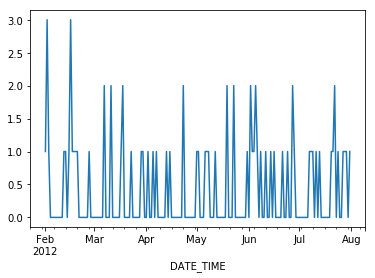

In [153]:
calls_per_day.plot()

In [151]:
# repitamos ahora pero por semana!
resampling_frequency = '1 w'
calls_per_week = calls_per_period(view, resampling_frequency)
calls_per_week.plot()